# Estimating Costs

## Approximating Costs

In [1]:
import pandas as pd

In [2]:
results_df_sklearn = pd.read_csv('AWS Results/results_df_sklearn.csv',index_col=0)
results_df_sklearn['Cost'] = results_df_sklearn['Average']/3600 * 0.2

In [3]:
results_df_rapids = pd.read_csv('AWS Results/results_df_rapids_ml.csv',index_col=0)
results_df_rapids['Cost'] = results_df_rapids['Average']/3600 *  0.379

In [4]:
spark = pd.read_csv('AWS Results/spark_ml_results.csv')

In [5]:
spark['Cost'] = spark['Average']/3600*(3*0.2)

## Vizualization

In [6]:
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, averages_spark, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Pandas')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')
    
    axs.bar(ind+width+width, 
        height=averages_spark, 
        width = width, 
        color='purple',label='Spark')

    axs.set_ylabel('Average Cost ($)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.xaxis.label.set_fontsize(20)
    axs.yaxis.label.set_fontsize(20)
    for item in (axs.get_xticklabels() + axs.get_yticklabels()):
        item.set_fontsize(20)
        
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=22)
    axs.legend(loc='upper left',prop={'size': 20})
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    
    if test == 'K Nearest Neighbour':
        ax_new = fig.add_axes([0.64, 0.235, 0.35, 0.20])
        plt.ylim(0, 0.0000006)
    else:
        ax_new = fig.add_axes([0.64, 0.72, 0.35, 0.20])
        plt.ylim(0, 0.00005)
    
    ax_new.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Scikit-Learn')

    ax_new.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')

    ax_new.bar(ind+width+width, 
            height=averages_spark, 
            width = width, 
            color='purple',label='Spark')

    ax_new.set_xticks([])
    for item in ax_new.get_yticklabels():
        item.set_fontsize(15)
    return axs

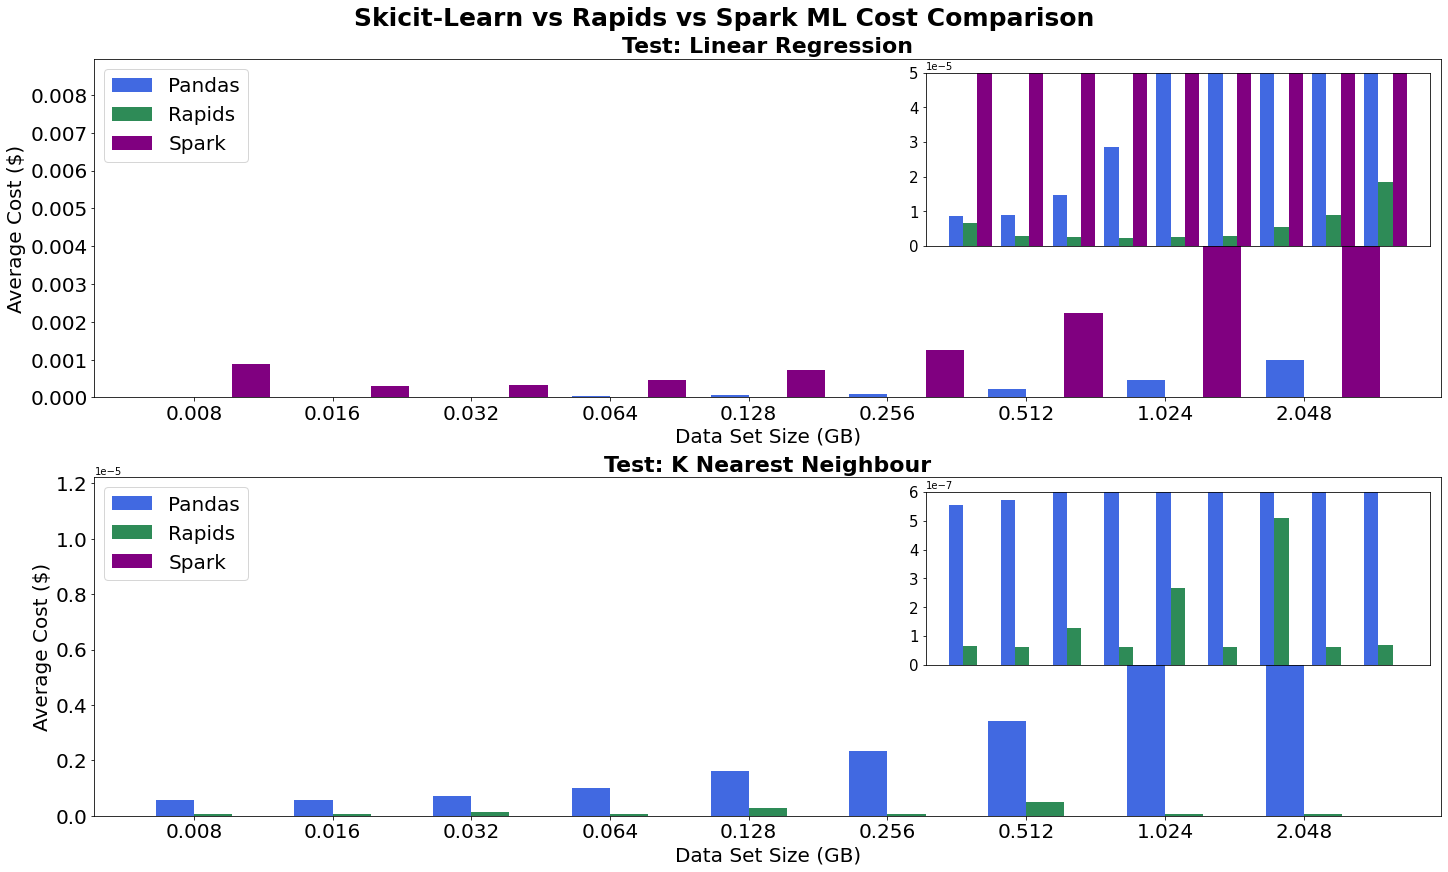

In [12]:
NUM_DSIZE_DOUBLINGS = 9

fig, (ax1, ax2) = plt.subplots(2, 1,constrained_layout = True)

fig.set_size_inches(20, 12)


fig.suptitle('Skicit-Learn vs Rapids vs Spark ML Cost Comparison', fontsize=25, fontweight="bold")

# Setting the number of bars
ind = np.arange(0, NUM_DSIZE_DOUBLINGS*2, 2)

# Defining the width between the bars
width = 0.55

# Defining the bar labels
bar_labels = np.round(results_df_sklearn['Test Size'].drop_duplicates(), 3).astype(str)

plot(ax1, 
     results_df_sklearn[results_df_sklearn['Test'] == 'Linear Regression']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'Linear Regression']['Cost'],
     spark[spark['Test'] == 'Linear Regression']['Cost'],
     'Linear Regression')

plot(ax2, 
     results_df_sklearn[results_df_sklearn['Test'] == 'K Nearest Neighbour']['Cost'],
     results_df_rapids[results_df_rapids['Test'] == 'K Nearest Neighbour']['Cost'],
     spark[spark['Test'] == 'K Nearest Neighbour']['Cost'],
     'K Nearest Neighbour')
plt.savefig('AWS Results/ml_cost.png')
plt.show()